In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix # multilable for >>> Multiclass Classification
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings # To avoid warning message...Which is shown bcz of New Upate of Python
warnings.filterwarnings("ignore")
import pickle


In [17]:
#1.Problem statement
#To predict person is survived or not using variuos variables



In [18]:
#2.Data Gathering
df = pd.read_csv("/content/titanic.csv")
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Gender,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
#3.EDA
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [22]:
column_list=['PassengerId','Name','Ticket','Cabin'] # These columns drop bcz of maximum no of Unique Values and object data type
df.drop(column_list,axis=1,inplace=True)


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
le.fit(df['Embarked'])
df['Embarked'] = le.transform(df['Embarked'])
df.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Gender,1.00,0.0000,0.000,0.0,1.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,2.00,0.0000,2.000,2.0,2.00


In [24]:
df['Embarked'].unique()

array([2, 0, 1, 3])

In [25]:
df.isna().sum()


Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [27]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [28]:
df.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
##feature selection
x = df.drop("Survived",axis=1)
y = df['Survived']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [37]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)



LogisticRegression()

In [39]:
#Evaluation
y_pred = lr_clf.predict(x_test)
y_pred[20:25] # Y predicted



array([0, 0, 1, 1, 0])

In [38]:
y_test[20:25] # y actual

288    1
21     1
139    0
556    1
562    0
Name: Survived, dtype: int64

In [40]:
###Accuracy
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnf_matrix)

Confusion matrix:
 [[110  27]
 [ 24  62]]


In [41]:
clf_report = classification_report(y_test,y_pred)
print("classification_report is :\n",clf_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       137
           1       0.70      0.72      0.71        86

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [42]:
y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob

array([[0.90029167, 0.09970833],
       [0.85411222, 0.14588778],
       [0.96293464, 0.03706536],
       [0.14686843, 0.85313157],
       [0.85966115, 0.14033885],
       [0.19056723, 0.80943277],
       [0.06365644, 0.93634356],
       [0.31948024, 0.68051976],
       [0.72250495, 0.27749505],
       [0.85413958, 0.14586042],
       [0.85738645, 0.14261355],
       [0.22373108, 0.77626892],
       [0.90861237, 0.09138763],
       [0.88538602, 0.11461398],
       [0.92673982, 0.07326018],
       [0.15286391, 0.84713609],
       [0.9360748 , 0.0639252 ],
       [0.74931546, 0.25068454],
       [0.30088823, 0.69911177],
       [0.88053593, 0.11946407],
       [0.85141051, 0.14858949],
       [0.79581681, 0.20418319],
       [0.31673641, 0.68326359],
       [0.13385944, 0.86614056],
       [0.74467791, 0.25532209],
       [0.0455196 , 0.9544804 ],
       [0.32356332, 0.67643668],
       [0.4393806 , 0.5606194 ],
       [0.34512933, 0.65487067],
       [0.18186952, 0.81813048],
       [0.

In [43]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob[:,1])

In [44]:
thresh


array([1.97764419, 0.97764419, 0.96765667, 0.96735423, 0.93634356,
       0.93524287, 0.86614056, 0.85313157, 0.80943277, 0.78366576,
       0.75231593, 0.74743985, 0.73618632, 0.72665254, 0.72128521,
       0.7147891 , 0.69911177, 0.68051976, 0.67393466, 0.65502985,
       0.65492375, 0.65487067, 0.65017564, 0.64142916, 0.63420056,
       0.61962753, 0.61835219, 0.60767844, 0.56748   , 0.5606194 ,
       0.55977222, 0.55233412, 0.53510613, 0.52218332, 0.52014209,
       0.50170843, 0.47763673, 0.44683191, 0.43971061, 0.43339494,
       0.39482924, 0.35609197, 0.35401952, 0.35094276, 0.32542233,
       0.29299107, 0.29111876, 0.26441129, 0.26221937, 0.25514933,
       0.25436715, 0.25428667, 0.25068454, 0.24526111, 0.22866881,
       0.22365593, 0.20418319, 0.17114008, 0.16338388, 0.15331459,
       0.14858949, 0.14261355, 0.14246546, 0.14033885, 0.13682442,
       0.11951504, 0.11946407, 0.10533624, 0.10393436, 0.10076571,
       0.09994517, 0.09970833, 0.09968317, 0.09958806, 0.09957

In [48]:
# @title ROC Curve


Text(0, 0.5, 'True Positive Rate')

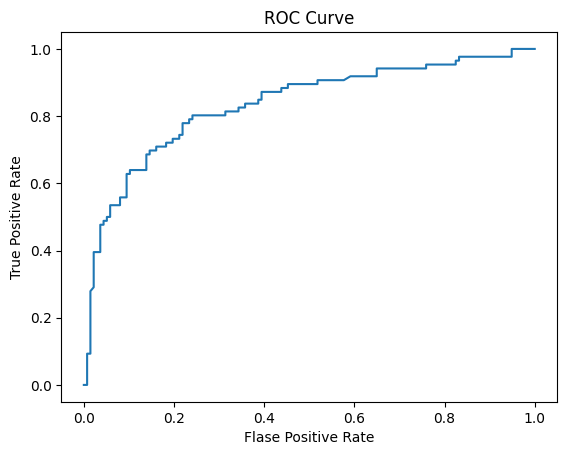

In [49]:
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")


In [ ]:

#save the model
file = open("expense_model.pkl", 'wb')
pickle.dump(linreg, file)